# Research module

This notebook is used to explore dataset provided from Kaggle, explore possible features and try out basic approaches on our model

In [1]:
import os
import math
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

Loading the training data and showing first 10 entries

In [2]:
train_data = pd.read_table("data/training_set.tsv")
train_data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Printing out distribution of essays based on average score

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f484ef6d208>],
      dtype=object)

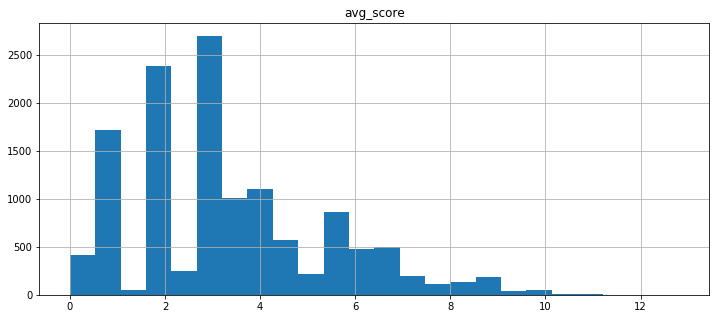

In [3]:
rating_columns = train_data.columns.values[3:].tolist()
train_data['avg_score']=train_data[rating_columns].mean(axis=1)
train_data[['essay_id', 'essay', 'avg_score']]
train_data.hist(column='avg_score', bins=24, ax= plt.figure(figsize = (12,5)).gca())

Printing out example of essay

In [4]:
train_data['essay'][0]

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econom

## Testing out models

In [12]:
import sklearn.feature_extraction.text as te
import sklearn.model_selection as msel
import nltk
from sklearn import preprocessing

kfold = msel.KFold(random_state=42)

idx_train, idx_test = next(kfold.split(train_data.essay))

tfidf_vectorizer = te.CountVectorizer()

xs = tfidf_vectorizer.fit_transform(train_data.essay.iloc[idx_train])
ys = train_data.avg_score.iloc[idx_train]
xs_test = tfidf_vectorizer.transform(train_data.essay.iloc[idx_test])
ys_test = train_data.avg_score.iloc[idx_test]

In [15]:
xs.shape

(8650, 23902)

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
ys_scaled = min_max_scaler.fit_transform(ys.values.reshape(-1,1))
ys_test_scaled = min_max_scaler.fit_transform(ys_test.values.reshape(-1,1))

ys_scaled

array([[0.078125  ],
       [0.078125  ],
       [0.078125  ],
       ...,
       [0.72798295],
       [0.66666667],
       [0.66666667]])

Simple Linear regression model with Count/tfidf vectorizer

In [17]:
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics

#classifiers = [
    #linear_model.BayesianRidge(),
    #linear_model.LassoLars(),
    #linear_model.ARDRegression(),
    #linear_model.PassiveAggressiveRegressor(),
    #linear_model.TheilSenRegressor(),
#    linear_model.LinearRegression()
#    ]

print(linear_model.LinearRegression(normalize=True))
clf = linear_model.LinearRegression()
clf.fit(xs.toarray(), ys_scaled)
ys_predicted = clf.predict(xs_test.toarray())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


In [20]:
ys_predicted_scaled = min_max_scaler.fit_transform(ys_predicted)
print("MSE: {0}".format(metrics.mean_squared_error(ys_test_scaled, ys_predicted_scaled)))

MSE: 0.04516211275582907
